<a href="https://colab.research.google.com/github/Darius2527/Phone-Manufacturing-Investment-Optimizer/blob/main/Phone_Manufacturing_Investment_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Optimal Phone Manufacturing Strategy Model
This model simulates a phone manufacturing business over time, determining the optimal strategy for buying machines and advertising to maximize the Net Present Value (NPV) of profits. It considers factors like production capacity, demand, machine lifespan, and costs to recommend actions for each year.

In [ ]:
from dataclasses import dataclass
import numpy as np

In [ ]:
@dataclass
class ModelInputs:
    n_phones: float = 100000  # Output per machine per year
    price_scrap: float = 50000  # Scrap value per machine
    price_phone: float = 500  # Selling price per phone
    cost_machine_adv: float = 1000000  # Cost for buying a machine or advertising per year
    cogs_phone: float = 250  # Cost of goods sold per phone (variable cost)
    n_life: int = 10  # Machine lifespan in years
    n_machines: int = 5  # Maximum number of machines
    d_1: float = 100000  # Initial demand
    g_d: float = 0.2  # Percentage increase in demand per advertisement
    max_year: int = 20  # Maximum number of years for the model
    interest: float = 0.05  # Market interest rate

    # Inputs for bonus problem (not used in the base model)
    elasticity: float = 100
    demand_constant: float = 300000

# Instantiate the model data
inputs = ModelInputs()
inputs

ModelInputs(n_phones=100000, price_scrap=50000, price_phone=500, cost_machine_adv=1000000, cogs_phone=250, n_life=10, n_machines=5, d_1=100000, g_d=0.2, max_year=20, interest=0.05, elasticity=100, demand_constant=300000)

In [ ]:
#model calculation
def phone_manufacturing_model(inputs:ModelInputs):
  #initialize variables
  machines_bought=[0]*inputs.max_year
  unusable_machines_each_year=[0]*inputs.max_year
  machines_in_operation=[0]*inputs.max_year
  production_capacity=[0]*inputs.max_year
  demand=[0]*inputs.max_year
  decision=[0]*inputs.max_year
  total_output=[0]*inputs.max_year
  revenue=[0]*inputs.max_year
  variable_costs=[0]*inputs.max_year
  scrap_value_each_year=[0]*inputs.max_year
  money_saved_from_no_action=[0]*inputs.max_year
  cash_flows=[0]*inputs.max_year
  npv=[0]*inputs.max_year
  was_machine_purchased_this_year=[0]*inputs.max_year
  year_of_end_of_lifespan=[]
  year_of_purchase=[]
  price_scrap=inputs.price_scrap

  #year1:must buy machine
  year=0
  machines_bought[0]=1
  unusable_machines_each_year[0]=0
  machines_in_operation[0]=1
  production_capacity[0]=inputs.n_phones*machines_in_operation[0]
  demand[0]=inputs.d_1
  decision[0]="buy machine"
  total_output[0]=min(demand[0],production_capacity[0])
  revenue[0]=total_output[0]*inputs.price_phone
  variable_costs[0]=total_output[0]*inputs.cogs_phone
  scrap_value_each_year[0]=0
  money_saved_from_no_action[0]=0
  cash_flows[0]=revenue[0]-variable_costs[0]-inputs.cost_machine_adv+scrap_value_each_year[0]+money_saved_from_no_action[0]
  npv[0]=cash_flows[0]/(1+inputs.interest)**(year)
  was_machine_purchased_this_year[0]="yes"
  year_of_end_of_lifespan.append(year+inputs.n_life)
  year_of_purchase.append(year)

  for year in range(1,inputs.max_year):
    if decision[year-1]=="buy machine" and machines_bought[year-1]<inputs.n_machines:
      machines_bought[year]=machines_bought[year-1]+1
    else:
      if machines_bought[year-1]==inputs.n_machines:
        machines_bought[year]=inputs.n_machines
      else:
        machines_bought[year]=machines_bought[year-1]

    if decision[year-1]=="buy machine":
      was_machine_purchased_this_year[year]="yes"
    else:
      was_machine_purchased_this_year[year]="no"

    if was_machine_purchased_this_year[year]=="yes":
      year_of_end_of_lifespan.append(year+inputs.n_life)
    else:
      year_of_end_of_lifespan.append("N/A")

    if was_machine_purchased_this_year[year]=="yes":
      year_of_purchase.append(year)
    else:
      year_of_purchase.append("N/A")

    if year in year_of_end_of_lifespan:
      unusable_machines_each_year[year]=unusable_machines_each_year[year-1]+1
    else:
      unusable_machines_each_year[year]=unusable_machines_each_year[year-1]

    machines_in_operation[year]=machines_bought[year]-unusable_machines_each_year[year]

    production_capacity[year]=machines_in_operation[year]*inputs.n_phones

    demand[year]=demand[year-1]*(1+inputs.g_d) if decision[year-1]=="advertise" else demand[year-1]

    if production_capacity[year]<=demand[year] and machines_bought[year]<inputs.n_machines:
      decision[year]="buy machine"
    else:
      if production_capacity[year]<=demand[year] and machines_bought[year]==inputs.n_machines:
        decision[year]="no action"
      else:
        decision[year]="advertise"

    total_output[year]=min(production_capacity[year],demand[year])

    revenue[year]=total_output[year]*inputs.price_phone

    variable_costs[year]=total_output[year]*inputs.cogs_phone

    scrap_value_each_year[year]=inputs.price_scrap if unusable_machines_each_year[year]>unusable_machines_each_year[year-1] else 0

    money_saved_from_no_action[year]=inputs.cost_machine_adv if decision[year]=="no action" else 0

    cash_flows[year]=revenue[year]-variable_costs[year]-inputs.cost_machine_adv+scrap_value_each_year[year]+money_saved_from_no_action[year]

    npv[year]=cash_flows[year]/(1+inputs.interest)**(year)


  return machines_bought, unusable_machines_each_year, machines_in_operation, production_capacity, demand, decision, total_output, revenue, variable_costs, scrap_value_each_year, money_saved_from_no_action, cash_flows, npv

machines_bought, unusable_machines_each_year, machines_in_operation, production_capacity, demand, decision, total_output, revenue, variable_costs, scrap_value_each_year, money_saved_from_no_action, cash_flows, npv = phone_manufacturing_model(inputs)


In [ ]:
print("machines bought:", machines_bought)
print("unusable machines each year:", unusable_machines_each_year)
print("machines in operation:", machines_in_operation)
print("production capacity:", production_capacity)
print("demand:", demand)
print("decision:", decision)
print("total output:", total_output)
print("revenue: $", revenue)
print("variable costs: $", variable_costs)
print("scrap value each year: $", scrap_value_each_year)
print("money saved from no action: $", money_saved_from_no_action)
print("cash flows: $", cash_flows)
print("NPV each year: $", npv)
print("total NPV: $", sum(npv))

machines bought: [1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5]
unusable machines each year: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3]
machines in operation: [1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2]
production capacity: [100000, 200000, 200000, 200000, 200000, 200000, 300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000, 300000, 200000, 200000, 200000, 200000]
demand: [100000, 100000, 120000.0, 144000.0, 172800.0, 207360.0, 207360.0, 248832.0, 298598.39999999997, 358318.07999999996, 358318.07999999996, 358318.07999999996, 358318.07999999996, 358318.07999999996, 358318.07999999996, 358318.07999999996, 358318.07999999996, 358318.07999999996, 358318.07999999996, 358318.07999999996]
decision: ['buy machine', 'advertise', 'advertise', 'advertise', 'advertise', 'buy machine', 'advertise', 'advertise', 'advertise', 'buy machine', 'buy machine', 'no action', 'no action', 'no action', 'no action', 'no action', 'no action', '

##Sensitivity analysis for NPV vs number of machines and initial demand

In [ ]:
n_machines_values=[2,3,4,5,6,7,8,9,10]
initial_demand_values=[25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000]

In [ ]:
output=[]
for num_machines in n_machines_values:
  for initial_demand in initial_demand_values:
    _, _, _, _, _, _, _, _, _, _, _, _, npv = phone_manufacturing_model(ModelInputs(n_machines=num_machines,d_1=initial_demand))
    output.append((num_machines,initial_demand,sum(npv)))
output

[(2, 25000, 110468290.14936478),
 (2, 50000, 211865441.35432467),
 (2, 75000, 283211953.6810411),
 (2, 100000, 331614677.6569803),
 (2, 125000, 358561397.38795656),
 (2, 150000, 376499525.0199618),
 (2, 175000, 387894082.843091),
 (2, 200000, 394798844.7478529),
 (2, 225000, 394798844.7478529),
 (2, 250000, 394798844.7478529),
 (2, 275000, 394798844.7478529),
 (2, 300000, 394798844.7478529),
 (3, 25000, 218944025.15787828),
 (3, 50000, 335658312.0386801),
 (3, 75000, 400486459.20320904),
 (3, 100000, 453364306.4929766),
 (3, 125000, 490984818.56161445),
 (3, 150000, 515544117.25230247),
 (3, 175000, 531114283.8346262),
 (3, 200000, 537030159.3980577),
 (3, 225000, 552468685.5265741),
 (3, 250000, 565480239.3544545),
 (3, 275000, 571149173.5948173),
 (3, 300000, 577725137.3136382),
 (4, 25000, 293562611.3431797),
 (4, 50000, 444134047.0471936),
 (4, 75000, 508962194.2117225),
 (4, 100000, 577157177.1773319),
 (4, 125000, 606801734.4024307),
 (4, 150000, 637151878.8851595),
 (4, 175000, 

In [ ]:
import pandas as pd
df=pd.DataFrame(output,columns=["number of machines","initial demand","NPV"])
df

,number of machines,initial demand,NPV
0,2,25000,1.104683e+08
1,2,50000,2.118654e+08
2,2,75000,2.832120e+08
3,2,100000,3.316147e+08
4,2,125000,3.585614e+08
...,...,...,...
103,10,200000,1.187427e+09
104,10,225000,1.276611e+09
105,10,250000,1.297256e+09
106,10,275000,1.332176e+09


In [ ]:
df.style.background_gradient(subset='NPV',cmap='RdYlGn')

,number of machines,initial demand,NPV
0,2,25000,110468290.149365
1,2,50000,211865441.354325
2,2,75000,283211953.681041
3,2,100000,331614677.656980
4,2,125000,358561397.387957
5,2,150000,376499525.019962
6,2,175000,387894082.843091
7,2,200000,394798844.747853
8,2,225000,394798844.747853
9,2,250000,394798844.747853


<Axes: xlabel='number of machines', ylabel='initial demand'>

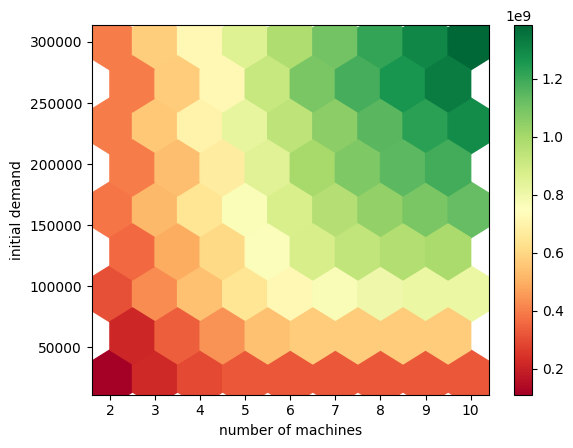

In [ ]:
df.plot.hexbin(x='number of machines',y='initial demand',C='NPV',gridsize=8,cmap='RdYlGn')

<Axes: xlabel='number of machines', ylabel='initial demand'>

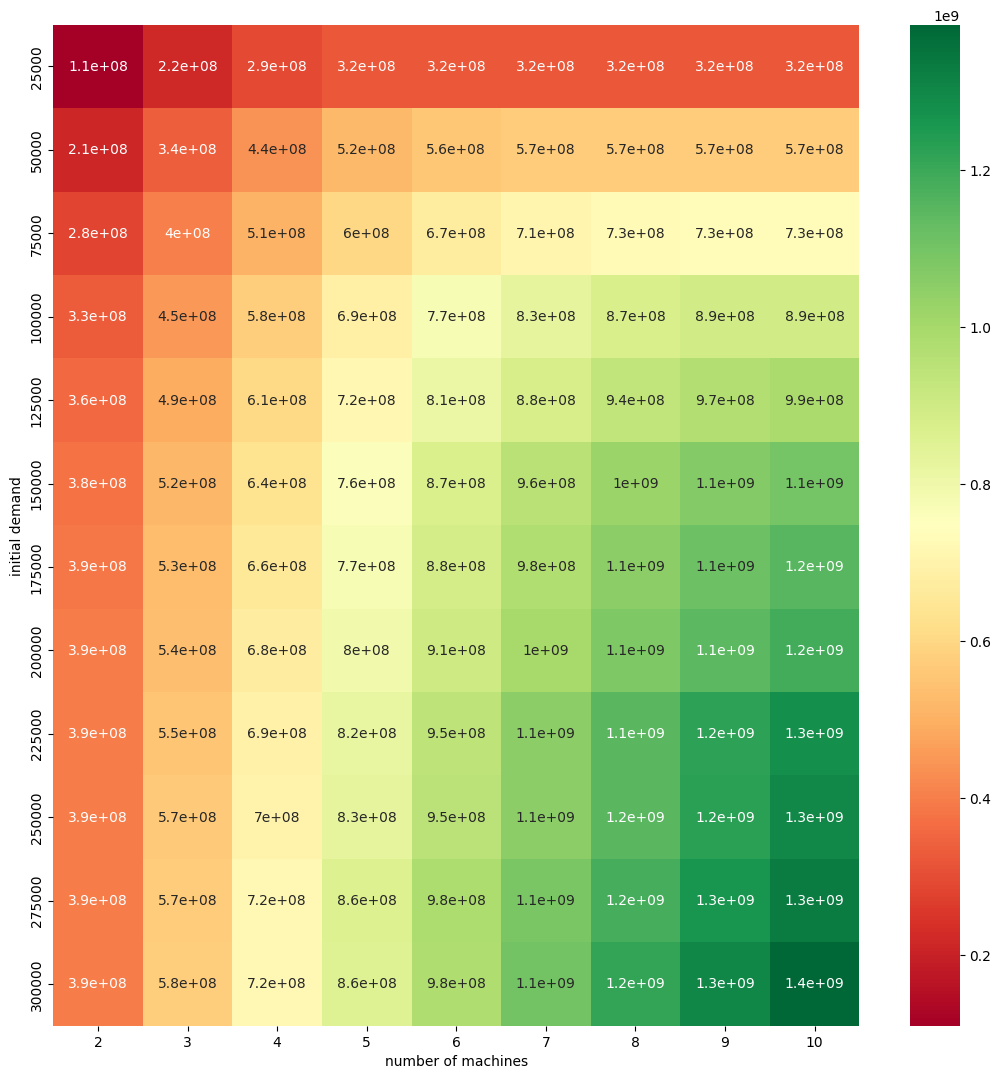

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,13))
df_pivot = df.pivot(index='initial demand', columns='number of machines', values='NPV')

sns.heatmap(df_pivot,cmap="RdYlGn", annot=True)